In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import root_mean_squared_error #this shows how well the feature explains the variance in target value

In [13]:
blood_sugar_df = pd.read_csv("diabetes_clean.csv")
print(blood_sugar_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [14]:
#use all the features in our dataset execpt the target
###we drop the target colunn from the feature set
####create a new feature and label
X = blood_sugar_df.drop("glucose", axis=1).values
y = blood_sugar_df.glucose.values


In [15]:
####making prediction with a single feature(BMI IS THE FEATURE)
X_bmi = X[:,3]
X_bmi=X_bmi.reshape(-1, 1) #features must be formated as a 2-dimensional ndarray
print(y.shape)
print(X_bmi.shape)

(768,)
(768, 1)


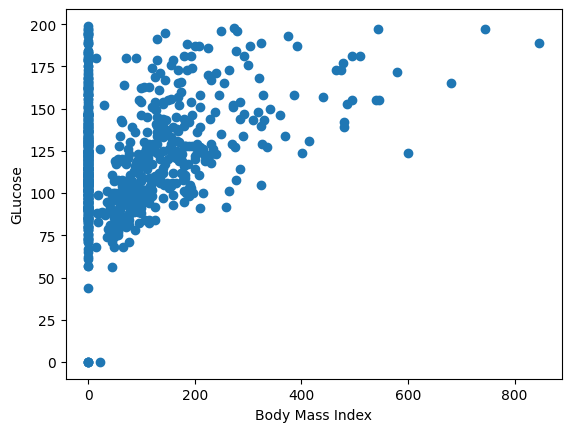

In [16]:
##PLOTING GLUCOSE VS BMI
plt.scatter(X_bmi, y)
plt.xlabel("Body Mass Index")
plt.ylabel("GLucose")
plt.show()

Text(0.5, 0, 'BMI')

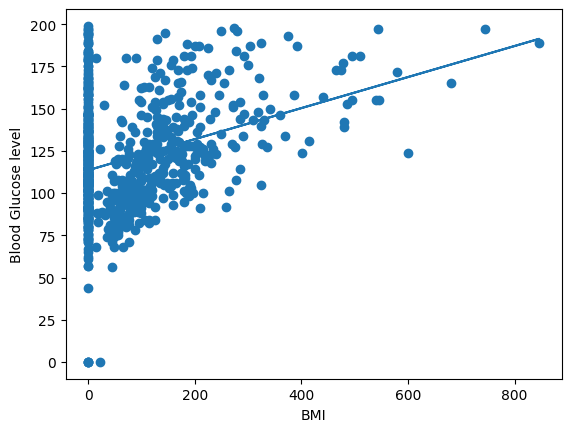

In [23]:
#fitting in a straight line
reg = LinearRegression()
reg.fit(X_bmi, y)
prediction = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, prediction)
plt.ylabel("Blood Glucose level")
plt.xlabel("BMI")


In [18]:
####Using many feature to predict a target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
reg_all = LinearRegression() #instantiate the model
#fit model on training data
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [19]:
#to complete the R-squared featre use score method on the test_set
R_squared = reg_all.score(X_test, y_test)

In [20]:
#evaluate performance of the model using root mean square error we use y_test and y_pred
RMSE = root_mean_squared_error(y_test, y_pred)

In [25]:
name = blood_sugar_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)


[-0.44744635  0.11662917 -0.28627271  0.0906138   0.31619679  0.81490392
  0.48641529 24.60117613]
